#### Welcome, in this notebook I will present my end-of-course project for the Exploratory Data Analysis course for the IBM Professional Certification in Machine Learning (https://www.coursera.org/professional-certificates/ibm-machine-learning)

####In this project, we will see the main operations that need to be performed in a 'classic' machine learning problem:
- Data Exploration;
- Data Cleaning;
- Hypothesis Testing.

####The dataset I used can be found at https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset

####This dataset is originally from the National Institute of Diabetes and Digestiv and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.

#### The first step is to install the necessary libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from scipy.stats import norm
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

####Import the dataset

Working with Google Colab, I find it very convenient to use Google Drive as a support. I always recommend connecting Colab and Drive and using it as storage for your raw datasets and processed datasets.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [28]:
data = pd.read_csv('/content/drive/MyDrive/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Data Exploration

In [4]:
# Using info() method to take some information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


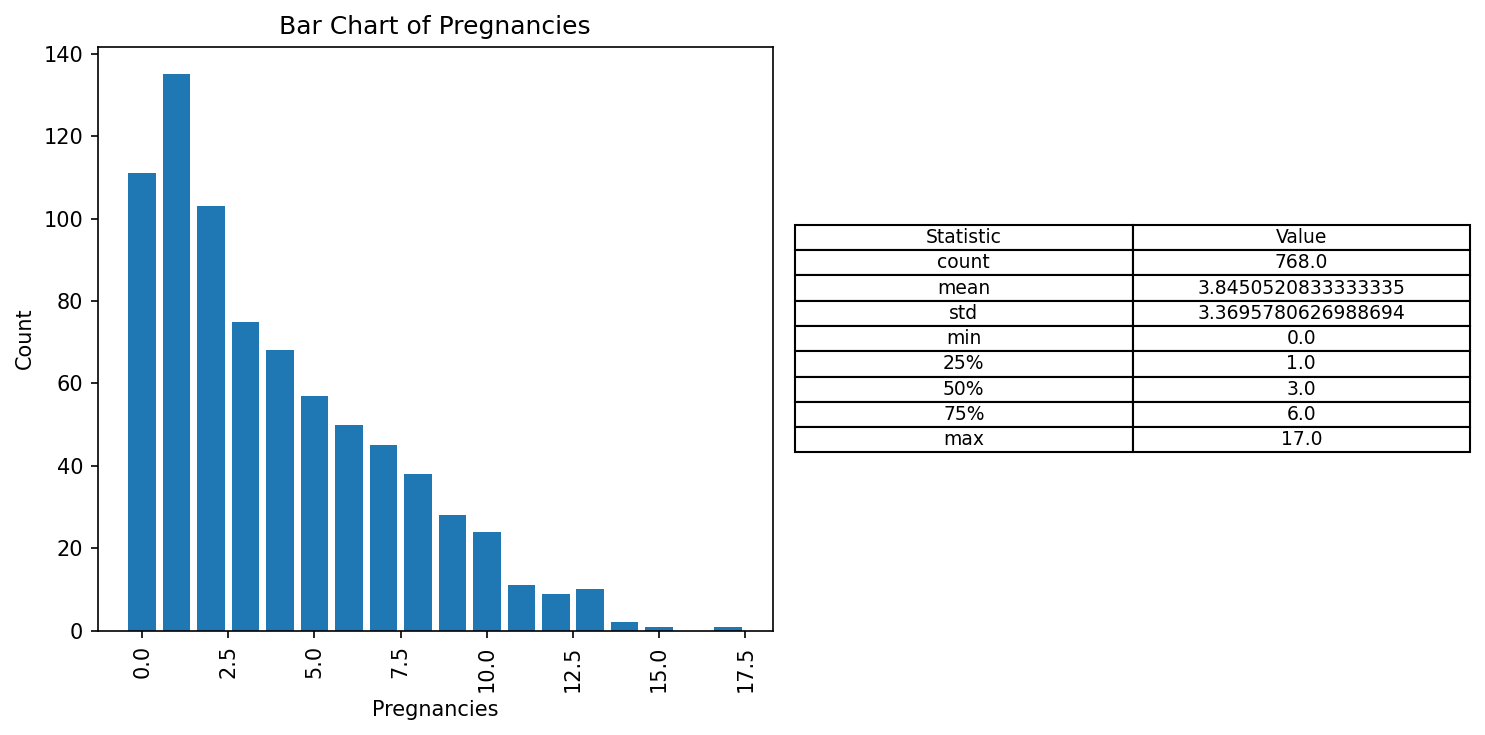

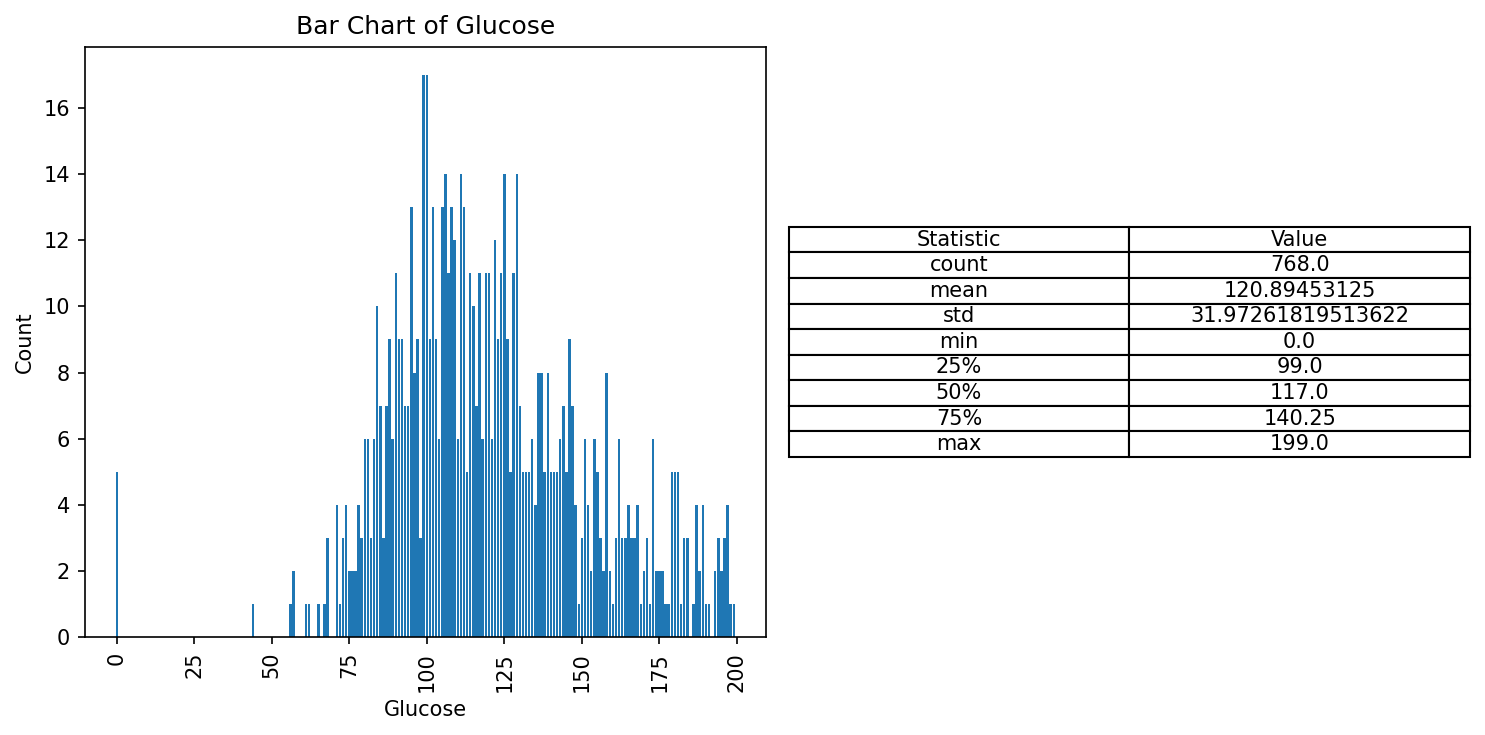

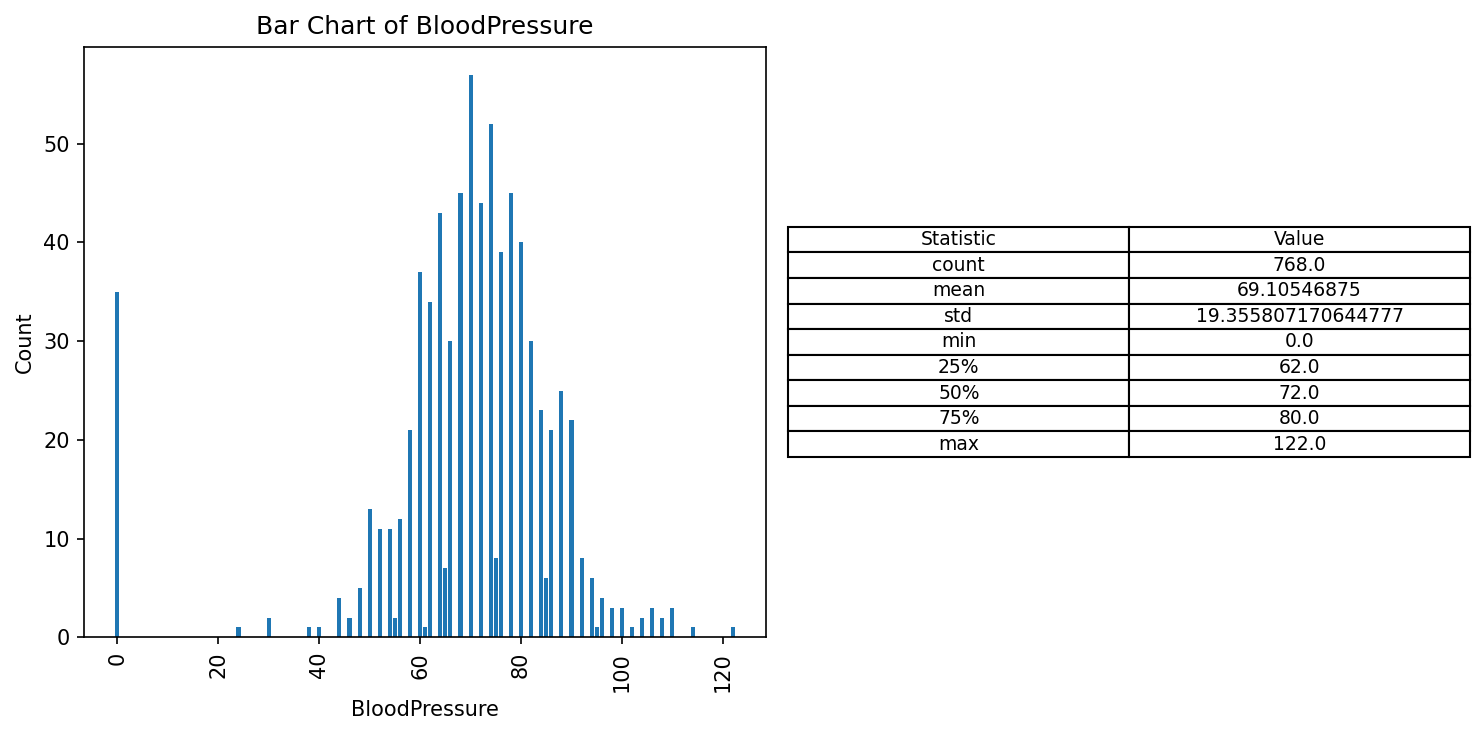

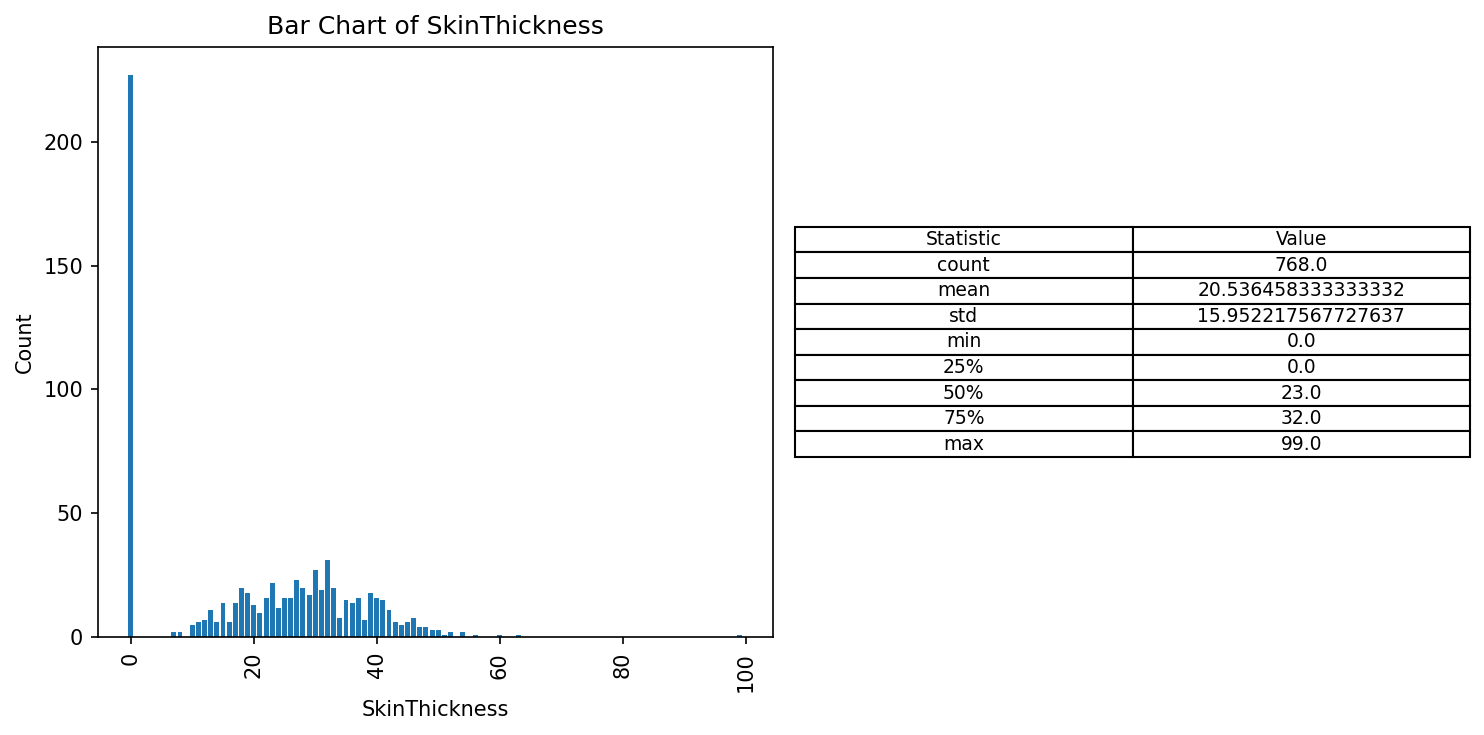

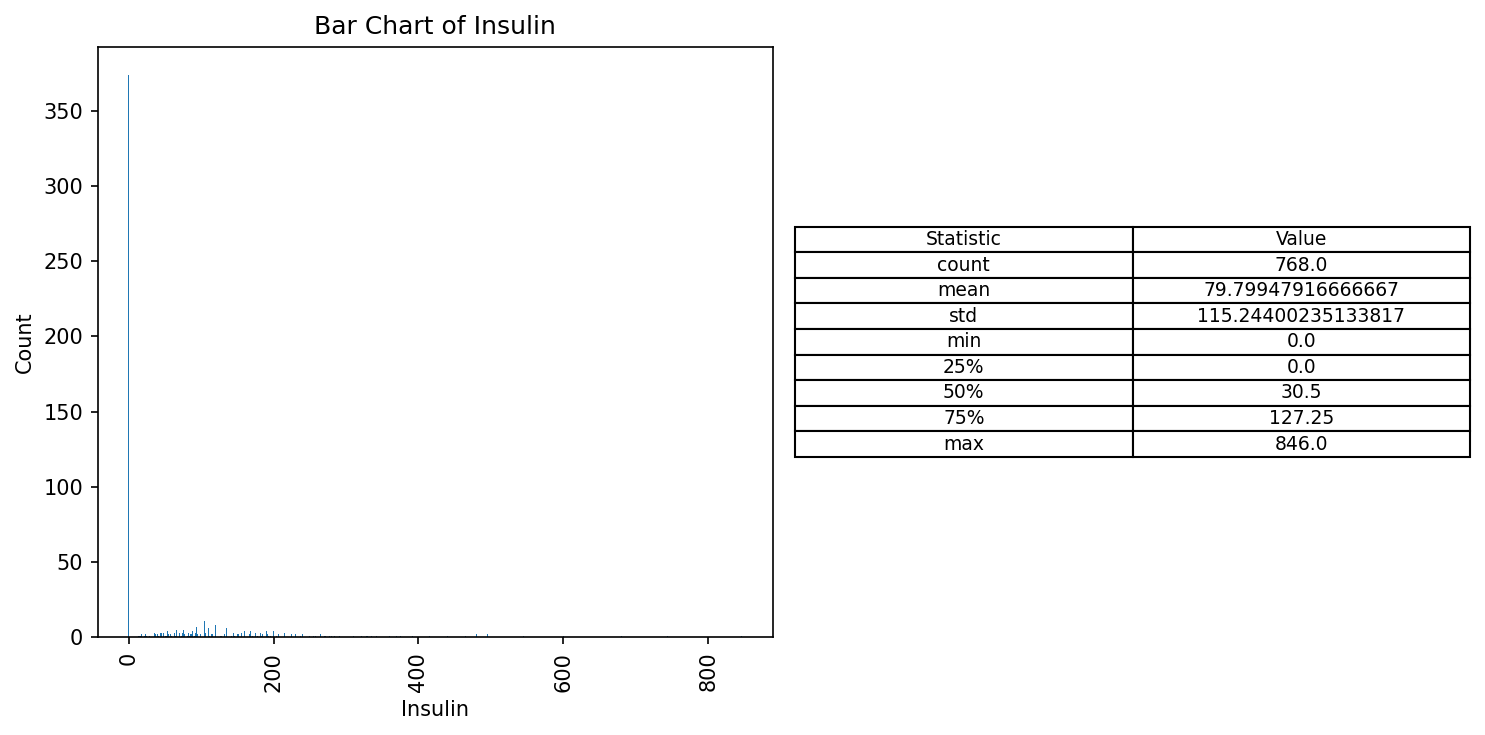

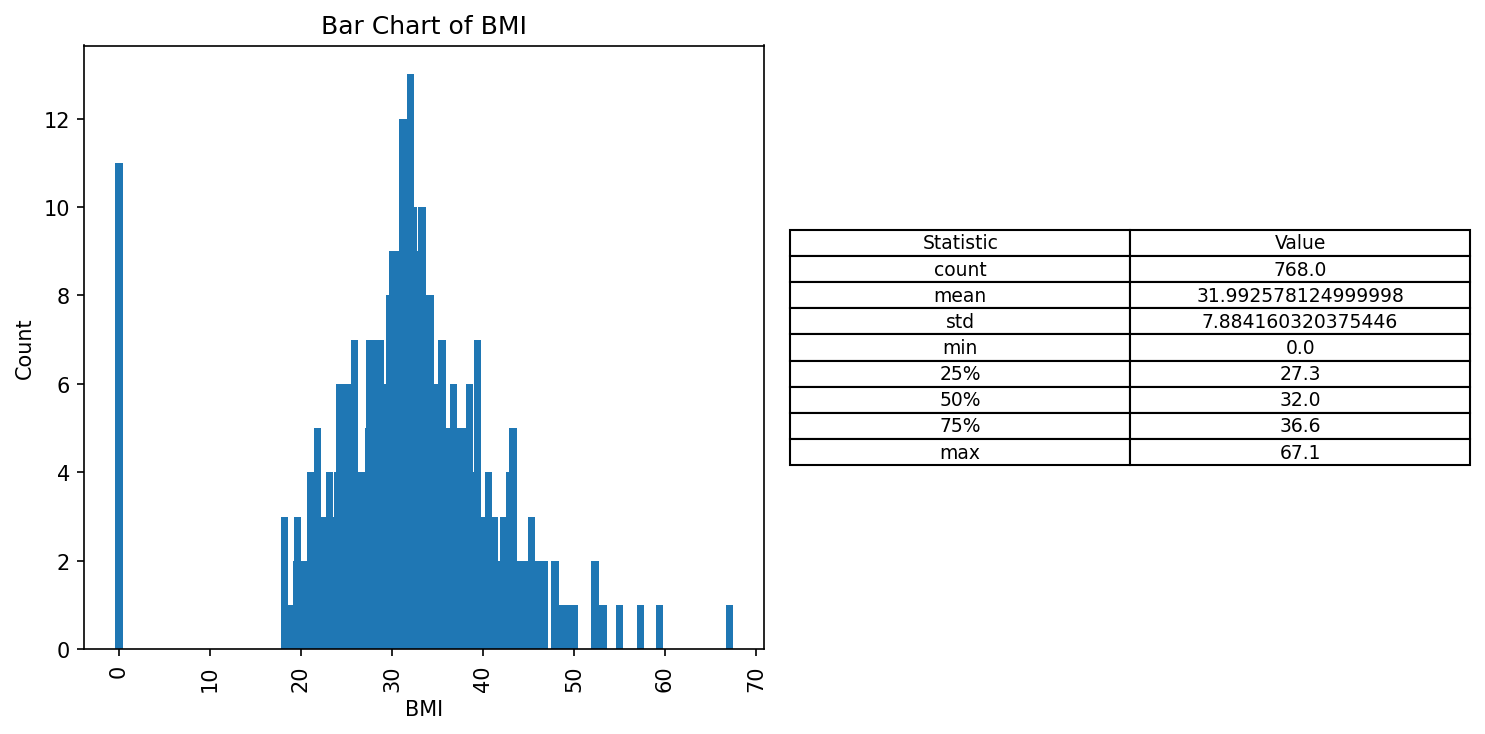

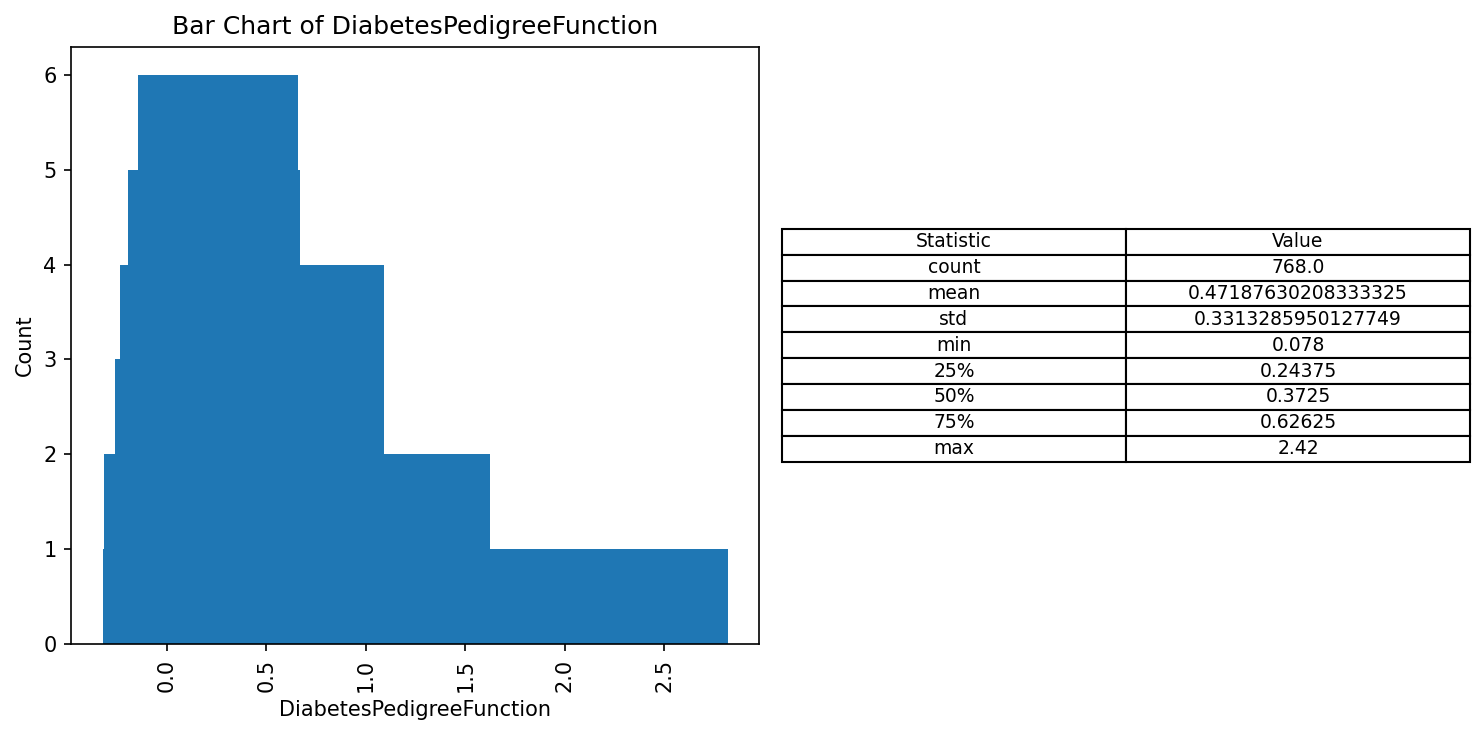

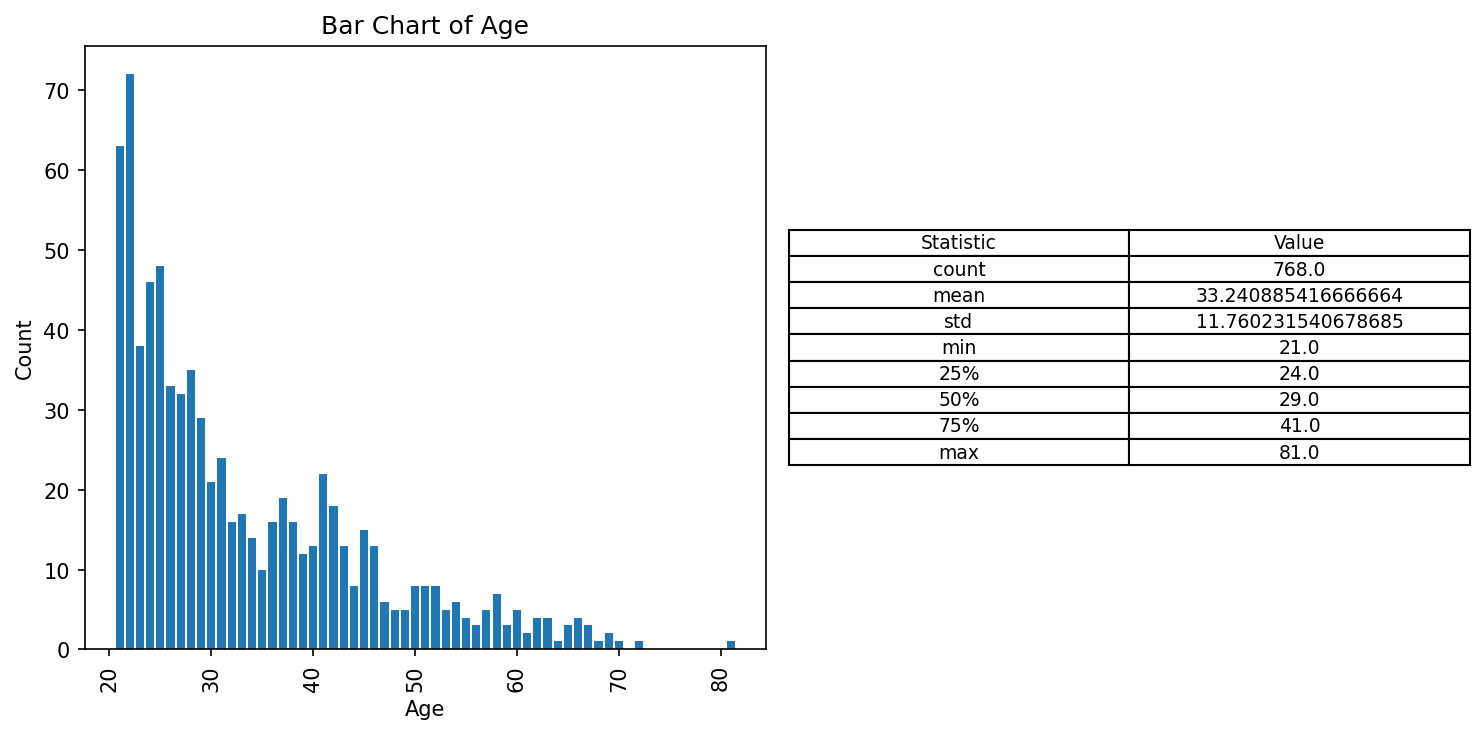

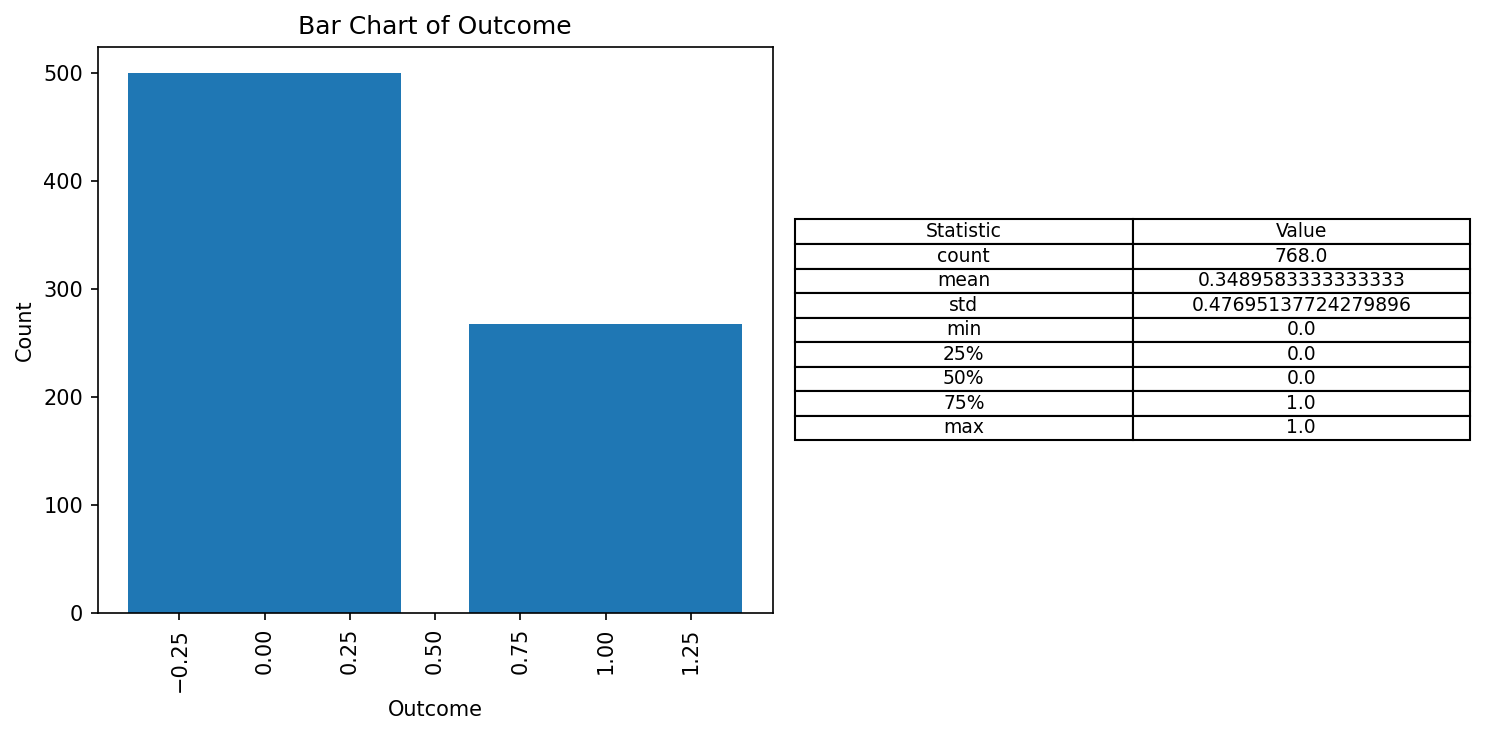

In [5]:
import matplotlib.pyplot as plt

# Define the number of columns for your subplots
num_columns = len(data.columns)

# Increase the DPI (dots per inch) for higher resolution
dpi = 150  # Adjust this value for your desired resolution

# Loop through each column and create a separate figure for each chart with statistics
for i, column in enumerate(list(data.columns)):
    value_counts = data[column].value_counts()

    # Create a subplot grid with 1 row and 2 columns (for the chart and statistics)
    fig, axes = plt.subplots(1, 2, figsize=(10, 5), dpi=dpi)  # Adjust the figsize and dpi as needed

    # Plot the bar chart
    ax1 = axes[0]
    ax1.bar(value_counts.index, value_counts)
    ax1.set_xlabel(column)
    ax1.set_ylabel('Count')
    ax1.set_title(f'Bar Chart of {column}')
    ax1.tick_params(axis='x', rotation=90)  # Rotate x-axis labels for readability

    # Add statistics table next to the chart
    ax2 = axes[1]
    ax2.axis('off')  # Turn off axis for the statistics table
    stats_table = data[column].describe().reset_index()
    cell_text = []
    for row in stats_table.values:
        cell_text.append([str(val) for val in row])
    ax2.table(cellText=cell_text, colLabels=['Statistic', 'Value'], cellLoc='center', loc='center')

    plt.tight_layout()  # Ensure proper spacing
    plt.savefig(f'bar_chart_with_stats_{column}.png', dpi=dpi, bbox_inches='tight')  # Save each figure as a separate PNG
    plt.show()


#### Thanks to the graphs and tables that display the statistics calculated for each column of the dataset, we can obtain various pieces of information


*   Pregnant column has a min at 0, mean at 3.8, 75% at 6 and max at 17, probably it has a positive skew
* DiabetesPedigreeFunction also has a positive skew for the same motivation
*   Insulin probably has outliers (the max value is 846, but the mean is 80, the std is 115 and the 75th percentile is 127)
*   BloodPressure, SkinThickness and BMI are values that cannot be 0, which might indicate missing information
* Insulin in individuals with type 1 diabetes has very low values. We can assume in this dataset that very low insulin values have been approximated to zero for simplicity



#### Now we calculate the correlation between the features and the target column. The calculation of correlation is important for several reasons:

* Understanding how variations in the features are associated with or influence the target variable;

* Feature Selection: Highly correlated features may be important for the model, while those with low correlation may be eliminated or considered less important;

* Identifying when two or more features are highly correlated with each other so that one can be removed;

* Model Interpretation: It can explain why the model is making certain predictions or which features are more influential in the predictions;

* Domain Validation: Correlation can confirm or refute hypotheses or existing knowledge about the association between features and the target.


####There are several ways to visually evaluate correlations. In this notebook I use 3 ways:

* Pairplot;
* Heatmap;
* Barplot.

####In my opinion, the best one is the heatmap because you can see the correlation between every feature not only with the target compactly.

In [ ]:
# Selection of numerical features
data_num = data.select_dtypes(include=['float64', 'int64'])

# Pearson correlation between features and target column
data_num_corr = data_num.corr()['Outcome'][:-1]

for i in range(len(data_num_corr)):
  print(f"{list(data_num_corr.sort_values(ascending=False).index)[i]}: {data_num_corr.sort_values(ascending=False)[i]}")

Glucose: 0.46658139830687373
BMI: 0.2926946626444454
Age: 0.23835598302719757
Pregnancies: 0.22189815303398636
DiabetesPedigreeFunction: 0.17384406565296004
Insulin: 0.13054795488404794
SkinThickness: 0.07475223191831946
BloodPressure: 0.06506835955033277


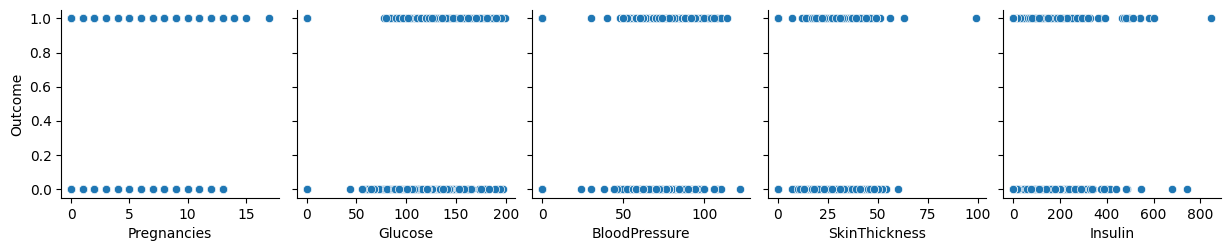

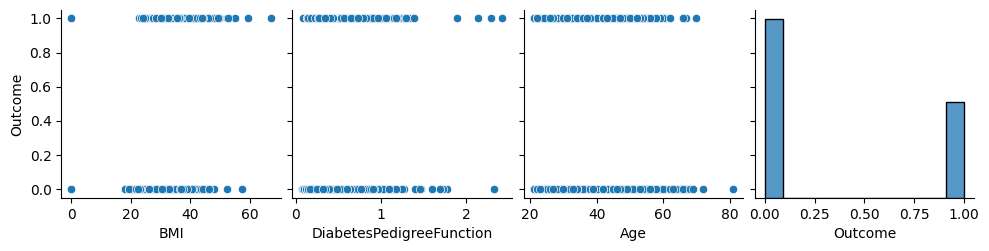

In [ ]:
# Pairplot
for i in range(0, len(data_num.columns), 5):
    sns.pairplot(data=data_num,
                 x_vars=data_num.columns[i:i+5],
                 y_vars=['Outcome'])

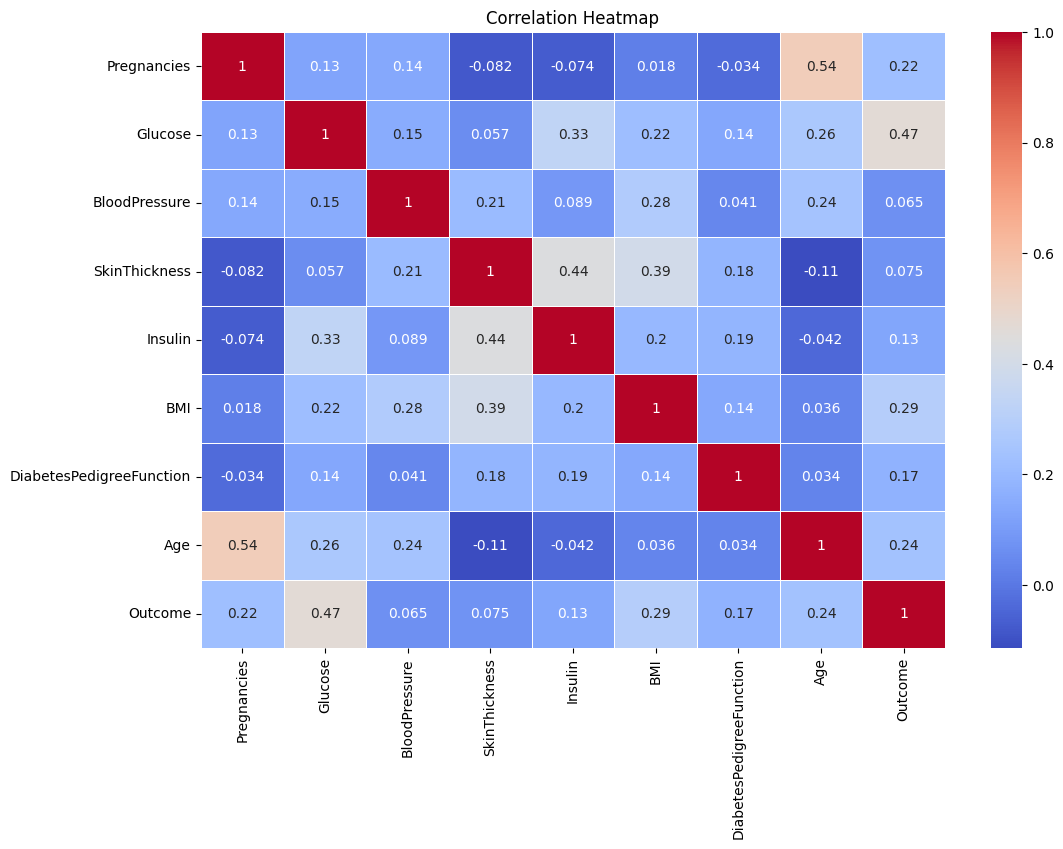

In [ ]:
# Heatmap
corr_matrix = data_num.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

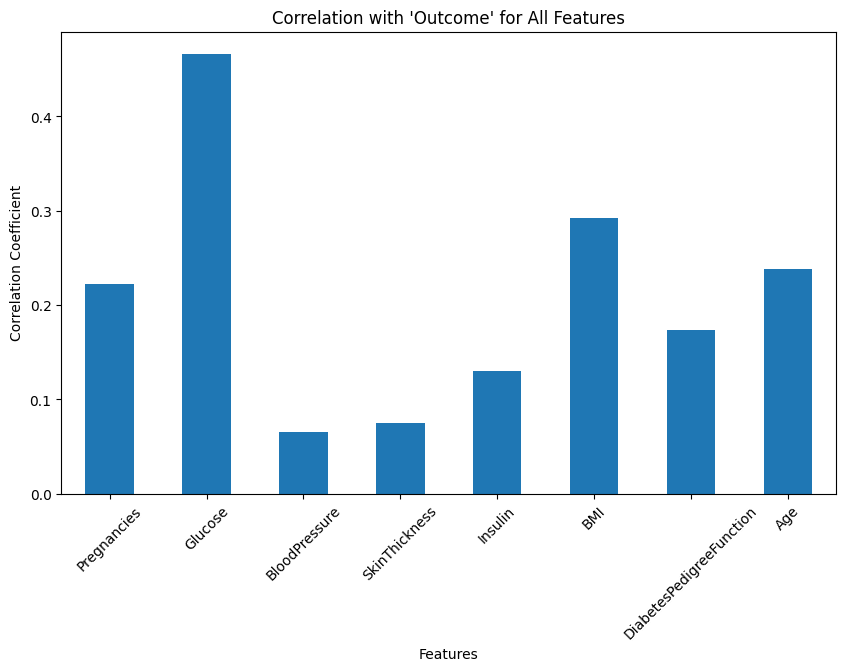

In [ ]:
# Barplot
plt.figure(figsize=(10, 6))
data_num_corr.plot(kind='bar')
plt.title("Correlation with 'Outcome' for All Features")
plt.xlabel("Features")
plt.ylabel("Correlation Coefficient")
plt.xticks(rotation=45)
plt.show()

#### There are several skewed columns:
*   Pregnancies
*   DiabetesPedigreeFunction
*   Age
*   Insulin

#### If we think about the meaning of the values, we will notice that insulin is skewed because there are more zero value In accordance with the fact that several samples have diabetes, pregiancies and age are justified by their means so, diabetespedigreefunction will transform.

<Axes: xlabel='DiabetesPedigreeFunction', ylabel='Density'>

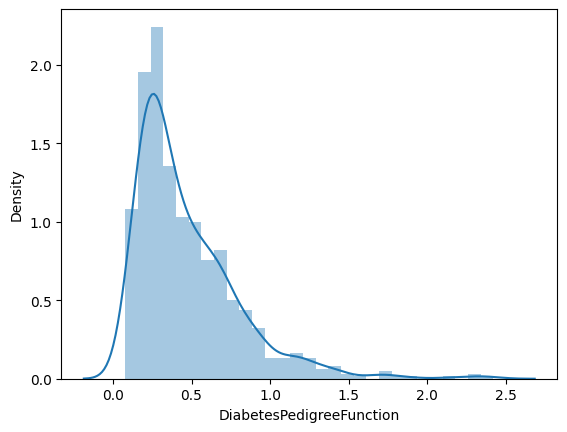

In [ ]:
sns.distplot(data['DiabetesPedigreeFunction'])

In [ ]:
print("Skew DiabetesPedigreeFunction: " , data['DiabetesPedigreeFunction'].skew())

Skew DiabetesPedigreeFunction:  1.919911066307204


#### There are many ways to handle a column suffering from skewness; we can use:

* logarithmic transformation;
* square root;
* standardization,
* Box-Cox transformation;
* others...

#### In our case, given a positive skew, I believe that logarithmic transformation is the best choice

Skewness: 0.114178


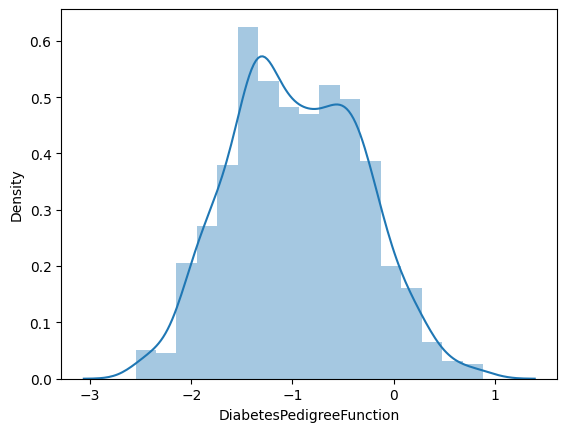

In [29]:
log_transformed = np.log(data['DiabetesPedigreeFunction'])
sp_transformed = sns.distplot(log_transformed)
print("Skewness: %f" % (log_transformed).skew())

In [30]:
data['DiabetesPedigreeFunction'] = log_transformed

#### Now we start to manage outliers. In our analysis we see that BloodPressure, SkinThickness and BMI have zero value, but we have assumed that these values cannot be null.

#### In general, when there are outliers, we are trying to determine whether they are special and significant cases or they can be eliminated. For example, we might consider performing a variance analysis to understand if by removing these samples, we lose a significant amount of variance in the other columns.

#### We will see variance analysis in the future project (probably in the PCA and Clustering project for this course) so now we can assume that these samples are not sifnigicant for the analysis and remove them.

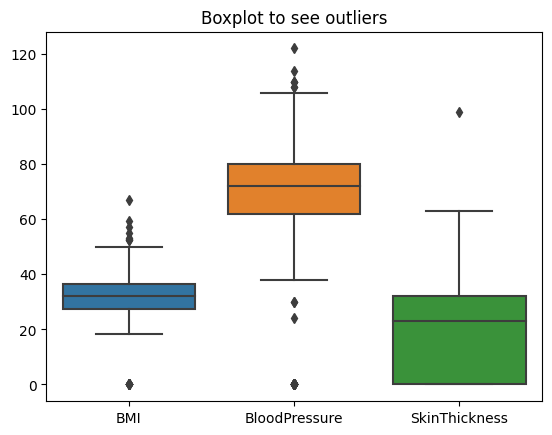

In [31]:
data_to_plot = data[['BMI', 'BloodPressure', 'SkinThickness']]

sns.boxplot(data=data_to_plot)

plt.title('Boxplot to see outliers')

plt.show()

#### Thanks to the boxplot (in my opinion the best way to see if there are outliers) we can see that there are some outliers with a higher value than the others. Keep in mind, Both very low values and very high values relative to the distribution can be outliers.

#### We can assume that both higher and lower values far from the distribution are still acceptable for a human with suboptimal physical conditions and therefore represent a significant case, so we will keep these samples. Meanwhile, those with a value of zero indicate missing information, and we will handle these samples by removing them.

In [32]:
data = data[data.apply(lambda row: not any(row[['BMI', 'BloodPressure', 'SkinThickness']] == 0.0), axis=1)]

In [33]:
data['BMI'].sort_values(ascending=True).head()

526    18.2
438    18.2
316    19.3
50     19.4
607    19.5
Name: BMI, dtype: float64

#### Now we can see, for example, that for the IBM column wee don't have zero value (identificated as outliers).

#### Insuline column
Insulin has many zeros, this can be represent missing information or a real case of low level that indicate diabete. In general, when a column has low variance, it is dropped. But in this case, the fact that this column has many zero values is justified by the meaning of the problem (diabete). So, we don't drop it.

In [34]:
data.reset_index(inplace=True, drop=True)

#### The scaling or normalization operation takes place if it is necessary for the specific model in question. If we intend to use a linear regressor, a neural network, or other models that are affected by the scales of values, then we must scale the data. However, if we plan to use a model like a decision tree, we may choose not to scale as it would be an inconsequential action. The purpose of this project is not to train a model, but for the sake of completeness, we will scale the features.

#### When distributions are subject to outliers that you do not want to filter out, it is useful to use standard scaling, which is more robust than Min-Max scaling. Alternatively, you can use Robust Scaling, a variation of Min-Max scaling where the minimum and maximum are replaced by the first and third quartiles.

In [35]:
features = data.columns.difference(['Outcome'])

scaler = StandardScaler()

data[features] = data[features].apply(lambda col: pd.Series(scaler.fit_transform(col.values.reshape(-1, 1)).flatten()), axis=0)

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.754197,0.852856,0.043180,0.553903,-0.928170,0.103337,0.665347,1.714905,1
1,-0.760402,-1.059456,-0.444982,-0.017742,-0.928170,-0.915669,-0.242691,-0.054631,0
2,-0.760402,-0.938039,-0.444982,-0.589387,-0.162574,-0.697311,-1.405273,-0.985966,0
3,-1.063322,0.518960,-2.560353,0.553903,0.440129,1.486275,2.691414,0.131636,1
4,-0.154562,-1.271935,-1.746749,0.268081,-0.211442,-0.275151,-0.786358,-0.520299,1


#### The last request of the final project for this first course of the IBM Machine Learning Professional Certificate is to make at least three hyphotesis and make a test to accept or reject it.

#### My three hyphotesis are:

> 1. 50 or more years old people was the 70% of all people that have outcome = 0
> 2. people with 0 pregiancies was the 65% of all people that have outcome = 1
> 3. people with insulin more than median value was the 60% of all people that have outcome = 0

Let's go to study the third hyphotesis.
The alternative hypothesis is: the median value of our samples isn't a good value to distinguish between outcome 0 and 1

How can we proceed? In this case, the best test we can perform is the Z-test. This test calculate a statistic based on the difference between the real one and the observed one.

The p-value we will obtain will tell us whether the difference between the proportions is statistically significant or not.

In [47]:
# Insuline median value
median_insulin = data['Insulin'].median()

# Data with outcome == 0
outcome_0 = data[data['Outcome'] == 0]

# Data with insuline value above the insuline median
above_median_insulin = outcome_0[outcome_0['Insulin'] > median_insulin]

# proportions
observed_proportion = len(above_median_insulin) / len(outcome_0)
expected_proportion = 0.6

# sample standard deviation
standard_error = np.sqrt((expected_proportion * (1 - expected_proportion)) / len(outcome_0))

# Z statistic
z = (observed_proportion - expected_proportion) / standard_error

# p-value
p_value = 2 * (1 - stats.norm.cdf(abs(z)))

if p_value < 0.05:
    print("The test is statistically significant (p-value = {:.12f}).".format(p_value))
else:
    print("The test is not statistically significant (p-value = {:.12f}).".format(p_value))


The test is statistically significant (p-value = 0.000000000003).


#### In conclusion, , this was the project I submitted at the end of the first course of the IBM Machine Learning Professional Certificate. Whether it can be an inspiration for you, I still recommend, in case you are pursuing the certification, to draw inspiration but to commit to doing personal and better work than this, studying and putting in effort is the purpose of acquiring a certification and is the key to success.